In [19]:
from InverseNeuralNet import ReverseNN
import matplotlib.pyplot as plt
import torch

MODELS_PATH = "./saved/"

device = (
    "cuda" 
    if torch.cuda.is_available()
    else "cpu"
)

# Load reverse network first, 
reverse_model = ReverseNN()
reverse_model.load_state_dict(torch.load(MODELS_PATH + "MNISTInverseNet", map_location=torch.device('cpu')))
reverse_model.eval()


ReverseNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=784, bias=True)
  )
)

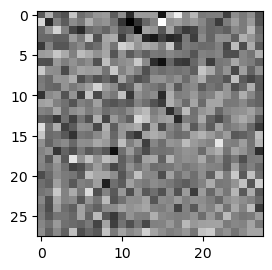

In [24]:
# Try to generate a handwritten digit

# digit = 9
# test_9 = torch.reshape(reverse_model(torch.tensor([1 if i == digit else 0 for i in range(10)], dtype=torch.float32)), [28,28])


# img2 = test_9.detach().numpy()

digit = 5
test_digit = torch.reshape(reverse_model(torch.tensor([1 if i == digit else 0 for i in range(10)], dtype=torch.float32)), [28,28])
img = test_digit.detach().numpy()


plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(img2, cmap="gray")

In [21]:
# LOAD FORWARD MODEL

from torchvision import models
import torch.nn as nn

model = models.resnet50(pretrained=True)
def change_layers(model):
    model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.fc = nn.Linear(2048, 10, bias=True)
    return model

# change to take in new input
model = change_layers(model)
model.load_state_dict(torch.load(MODELS_PATH + "MNISTConvNet"))

<All keys matched successfully>

In [25]:
# Make predictions with forward model
test_digit_new = test_digit.unsqueeze(0).unsqueeze(0)
model.eval()
print(model(test_digit_new))
print([1 if i == digit else 0 for i in range(10)])

tensor([[-2.9732, -1.7036, -6.6209,  1.3210, -4.7838, 17.0859, -0.8995, -2.6424,
          1.8111, -1.5475]], grad_fn=<AddmmBackward0>)
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
